# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Mobius Capital Founder Says Crypto Is Not an Investment but ‘a Means to Speculate and Have Fun’.  Mobius Capital Partners founder Mark Mobius says that cryptocurrency is not an investment, calling it &#x201C;a means to speculate and have fun.&#x201D; He prefers stocks and believes &#x201C;the U.S. market is going to continue to prosper and continue to do well.&#x201D; Mark Mobius Does Not See Crypto as an Investment Mark Mobius, the founder of [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/mobius-capital-founder-crypto-is-not-an-investment-means-to-speculate-have-fun/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Ottawa says 95% of federal public servants fully vaccinated as mandate approaches | CBC News.  More than 95 per cent of federal public servants are fully vaccinated against COVID-19 and 98 per cent have received at least one dose, according to new figures published by the government on Wednesday night. ... [| Skaityti daugiau](http://www.cbc.ca/news/politics/federal-public-servants-vaccination-status-1.6236484) 

### Kainų kaita pandemijos metu

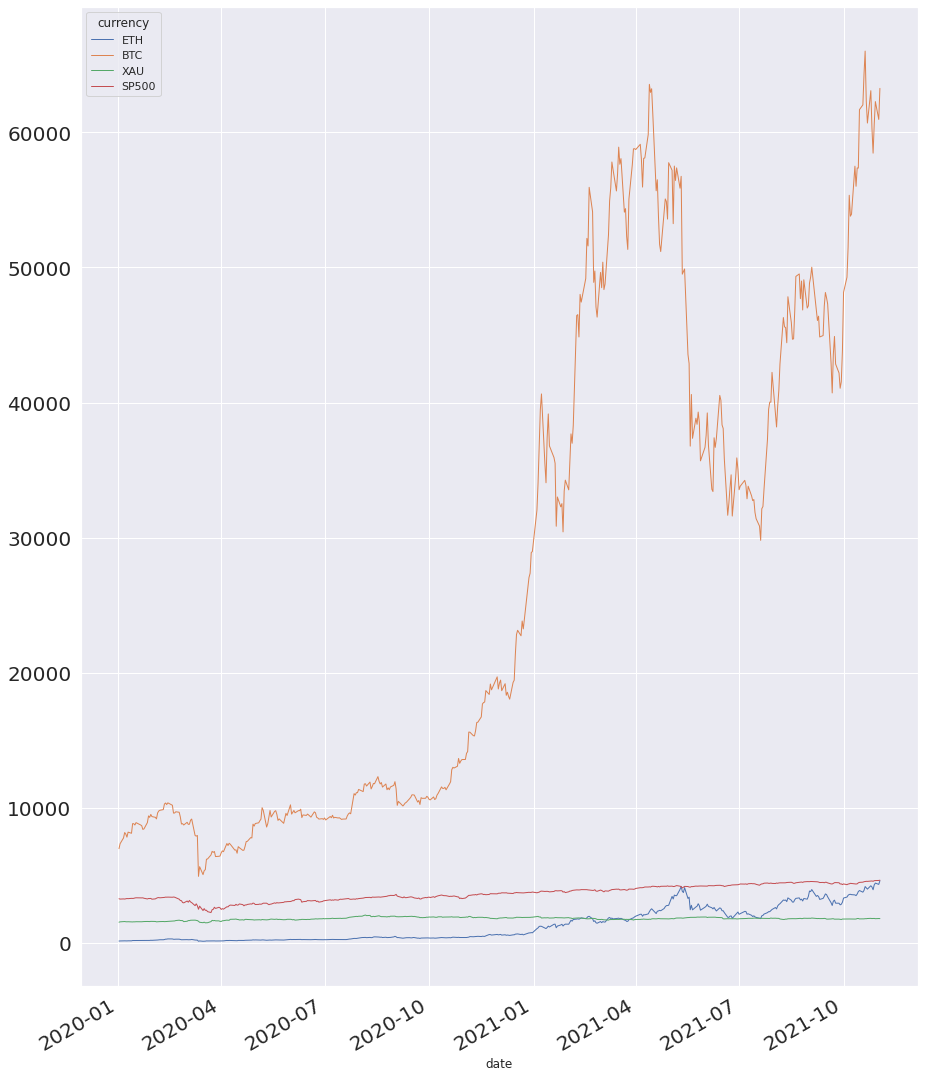

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.901015,0.141853,0.899273
BTC,0.901015,1.000000,0.117309,0.861925
XAU,0.141853,0.117309,1.000000,0.307176
SP500,0.899273,0.861925,0.307176,1.000000


In [8]:
#hide ### Koreliacijos matrica.

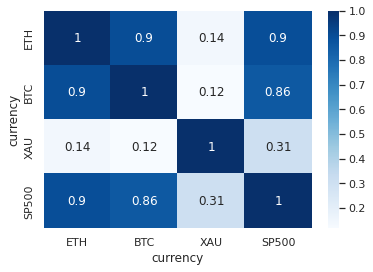

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')